In [ ]:
# from tensorflow.compat.v1 import ConfigProto
# from tensorflow.compat.v1 import InteractiveSession

# config = ConfigProto()
# config.gpu_options.per_process_gpu_memory_fraction = 0.5 # This sets the maximum allowed GPU utilization to 50%
# config.gpu_options.allow_growth = True
# session = InteractiveSession(config=config)

In [92]:
import os
import numpy as np
import tensorflow as tf
tf.__version__
from glob import glob

In [1]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from tensorflow.keras.applications.vgg16 import VGG16,preprocess_input

<pre>
tf.keras.applications.VGG16(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
) 
</pre>

The include_top = False, tells to skip the layers of VGG16 from Flatten (including Flatten). So we need to specify it aftewards.

In [2]:
vgg16 = VGG16(input_shape=(224, 224, 3),weights='imagenet',include_top=False)

In [3]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

### Here you can see, in our model we do not have the Faltten and FullyConnected Layers, as in the full VGG model given below
<pre>
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       295168    
_________________________________________________________________
block3_conv2 (Conv2D)        (None, 56, 56, 256)       590080    
_________________________________________________________________
block3_conv3 (Conv2D)        (None, 56, 56, 256)       590080    
_________________________________________________________________
block3_pool (MaxPooling2D)   (None, 28, 28, 256)       0         
_________________________________________________________________
block4_conv1 (Conv2D)        (None, 28, 28, 512)       1180160   
_________________________________________________________________
block4_conv2 (Conv2D)        (None, 28, 28, 512)       2359808   
_________________________________________________________________
block4_conv3 (Conv2D)        (None, 28, 28, 512)       2359808   
_________________________________________________________________
block4_pool (MaxPooling2D)   (None, 14, 14, 512)       0         
_________________________________________________________________
block5_conv1 (Conv2D)        (None, 14, 14, 512)       2359808   
_________________________________________________________________
block5_conv2 (Conv2D)        (None, 14, 14, 512)       2359808   
_________________________________________________________________
block5_conv3 (Conv2D)        (None, 14, 14, 512)       2359808   
_________________________________________________________________
block5_pool (MaxPooling2D)   (None, 7, 7, 512)         0         
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
fc1 (Dense)                  (None, 4096)              102764544 
_________________________________________________________________
fc2 (Dense)                  (None, 4096)              16781312  
_________________________________________________________________
predictions (Dense)          (None, 1000)              4097000   
=================================================================
Total params: 138,357,544
Trainable params: 138,357,544
Non-trainable params: 0
_________________________________________________________________

In [96]:
vgg16.layers[1].trainable_weights

[<tf.Variable 'block1_conv1/kernel:0' shape=(3, 3, 3, 64) dtype=float32, numpy=
 array([[[[ 4.29470569e-01,  1.17273867e-01,  3.40129584e-02, ...,
           -1.32241577e-01, -5.33475243e-02,  7.57738389e-03],
          [ 5.50379455e-01,  2.08774377e-02,  9.88311544e-02, ...,
           -8.48205537e-02, -5.11389151e-02,  3.74943428e-02],
          [ 4.80015397e-01, -1.72696680e-01,  3.75577137e-02, ...,
           -1.27135560e-01, -5.02991639e-02,  3.48965675e-02]],
 
         [[ 3.73466998e-01,  1.62062630e-01,  1.70863140e-03, ...,
           -1.48207128e-01, -2.35300660e-01, -6.30356818e-02],
          [ 4.40074533e-01,  4.73412387e-02,  5.13819456e-02, ...,
           -9.88498852e-02, -2.96195745e-01, -7.04357103e-02],
          [ 4.08547401e-01, -1.70375049e-01, -4.96297423e-03, ...,
           -1.22360572e-01, -2.76450396e-01, -3.90796512e-02]],
 
         [[-6.13601133e-02,  1.35693997e-01, -1.15694344e-01, ...,
           -1.40158370e-01, -3.77666801e-01, -3.00509870e-01],
    

In [97]:
vgg16.layers[1].non_trainable_weights

[]

In [98]:
vgg16.layers[1].trainable

True

In [99]:
# Freezing the Imagenet weights for the vgg16 layers
for layer in vgg16.layers:
    layer.trainable = False

In [100]:
vgg16.layers[1].trainable

False

In [101]:
vgg16.layers[1].non_trainable_weights

[<tf.Variable 'block1_conv1/kernel:0' shape=(3, 3, 3, 64) dtype=float32, numpy=
 array([[[[ 4.29470569e-01,  1.17273867e-01,  3.40129584e-02, ...,
           -1.32241577e-01, -5.33475243e-02,  7.57738389e-03],
          [ 5.50379455e-01,  2.08774377e-02,  9.88311544e-02, ...,
           -8.48205537e-02, -5.11389151e-02,  3.74943428e-02],
          [ 4.80015397e-01, -1.72696680e-01,  3.75577137e-02, ...,
           -1.27135560e-01, -5.02991639e-02,  3.48965675e-02]],
 
         [[ 3.73466998e-01,  1.62062630e-01,  1.70863140e-03, ...,
           -1.48207128e-01, -2.35300660e-01, -6.30356818e-02],
          [ 4.40074533e-01,  4.73412387e-02,  5.13819456e-02, ...,
           -9.88498852e-02, -2.96195745e-01, -7.04357103e-02],
          [ 4.08547401e-01, -1.70375049e-01, -4.96297423e-03, ...,
           -1.22360572e-01, -2.76450396e-01, -3.90796512e-02]],
 
         [[-6.13601133e-02,  1.35693997e-01, -1.15694344e-01, ...,
           -1.40158370e-01, -3.77666801e-01, -3.00509870e-01],
    

In [102]:
vgg16.layers[1].trainable_weights

[]

### We can see here that all the weights that were first in trainable section are now in to non_trainable section

In [103]:
# Usefull for getting number of output classes
glob('Data\\DogCat\\training_set\\*')

['Data\\DogCat\\training_set\\cats', 'Data\\DogCat\\training_set\\dogs']

Alternate method to avoid using glob

In [5]:
classes = os.listdir('Data/DogCat/training_set')
n_classes = len(classes)
len(classes),classes

(2, ['cats', 'dogs'])

In [14]:
# Here we are passing the output of our vgg16 model to this flatten layer
flatten_layer = layers.Flatten()(vgg16.output) 
prediction_layer = layers.Dense(n_classes,activation = 'softmax')(flatten_layer)
model = Model(inputs = vgg16.input,outputs=prediction_layer)

In [13]:
# model.summary();

In [15]:
model.compile(
    loss='categorical_crossentropy', # Here we are using catrgorical as we are using softmax. With sigmoid we would have used binary crossentropy
    optimizer = 'adam',
    metrics=['accuracy']
)

In [108]:
train_data = ImageDataGenerator(rescale = 1./255,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True)

test_data = ImageDataGenerator(rescale = 1./255)

In [109]:
train_dataset = train_data.flow_from_directory('Data/DogCat/training_set',
                                target_size=(224,224),
                                batch_size= 32, # This is like the batch size for mini-batch SGD, i.e after 32 data points backpropogation will take place.
                                class_mode='categorical' ) # Here also categorical as we are using softmax

test_dataset = test_data.flow_from_directory('Data/DogCat/test_set',
                                target_size=(224,224),
                                batch_size= 32,
                                class_mode='categorical' )

Found 8003 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


So here for 8003 data points and batch size of 32, the algo will backpropogate 251( ceil(8003/32) ) times in every epoch.

In [111]:
model.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=2,
    steps_per_epoch=len(train_dataset),
    validation_steps=len(test_dataset),
    workers=2
)

Epoch 1/2
 15/251 [>.............................] - ETA: 28:23 - loss: 0.3948 - accuracy: 0.8146

KeyboardInterrupt: 

In [ ]:
model.save('saved_models/DogCats CNN/vgg16_catdog_model.h5')

... results

## Predictions

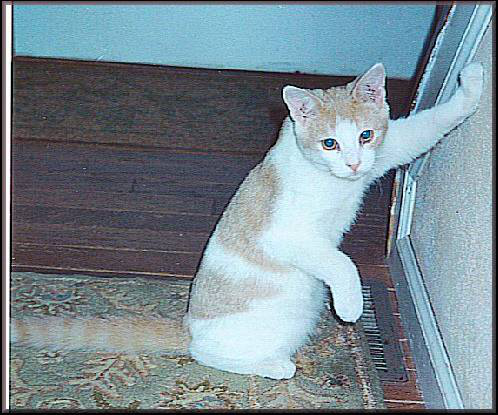

In [77]:
img = load_img('Data/DogCat/test_set/cats/cat.4001.jpg')
img

In [79]:
img_vector = img_to_array(img)
img_vector

array([[[  9.,  16.,   9.],
        [  3.,   0.,   0.],
        [ 22.,   5.,  15.],
        ...,
        [  4.,   0.,   0.],
        [  1.,   1.,   3.],
        [  1.,   1.,   3.]],

       [[  0.,   3.,   0.],
        [ 11.,   7.,   6.],
        [109.,  89.,  98.],
        ...,
        [ 89.,  83.,  85.],
        [  1.,   1.,   3.],
        [  1.,   1.,   3.]],

       [[  8.,  13.,   6.],
        [ 15.,  11.,   8.],
        [118.,  99., 105.],
        ...,
        [ 65.,  60.,  64.],
        [  1.,   1.,   3.],
        [  1.,   1.,   3.]],

       ...,

       [[  0.,   7.,   6.],
        [  6.,  12.,  12.],
        [ 88.,  88.,  90.],
        ...,
        [ 48.,  53.,  47.],
        [  1.,   1.,   3.],
        [  1.,   1.,   3.]],

       [[  1.,  13.,   9.],
        [  0.,   3.,   0.],
        [  8.,  12.,  11.],
        ...,
        [  0.,   2.,   0.],
        [  1.,   1.,   3.],
        [  1.,   1.,   3.]],

       [[  0.,   5.,   0.],
        [  0.,  11.,   7.],
        [  0.,  

In [80]:
img_vector.shape

(415, 498, 3)

In [81]:
img_vector = img_vector/255

In [87]:
img_vector = np.expand_dims(img_vector,axis=0)
img_data = preprocess_input(img_vector)
img_data.shape

(1, 415, 498, 3)

In [ ]:
model.predict(img_data)